In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [92]:
# pm1 y pm2 en minutos (puede tener decimales)
pm1 = 1103 # best 1 min: 1103, best 60 min: 130
pm2 = 1144 # best 1 min: 1144, best 60 min: 136

In [93]:
the_path = os.getcwd()
data_path = os.path.join(the_path, '../data/processed-data/')
file_name = 'processed.csv'
file_path = data_path + file_name
df = pd.read_csv(file_path, index_col='Date')

In [94]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(5)

,Average
Date,
2011-09-13 13:53:00,5.9
2011-09-13 13:54:00,5.9
2011-09-13 13:55:00,5.9
2011-09-13 13:56:00,5.9
2011-09-13 13:57:00,5.9


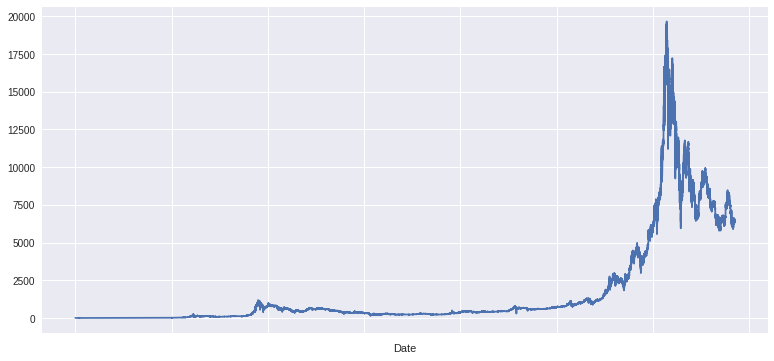

In [95]:
df['Average'].plot(figsize=(13,6))

In [96]:
# getting just last 6 months
df.index = pd.to_datetime(df.index)
df_M = df.last('180D').copy()
df_M.head(5)

,Average
Date,
2018-02-21 00:01:00,11129.685
2018-02-21 00:02:00,11110.040
2018-02-21 00:03:00,11104.165
2018-02-21 00:04:00,11069.470
2018-02-21 00:05:00,11084.255


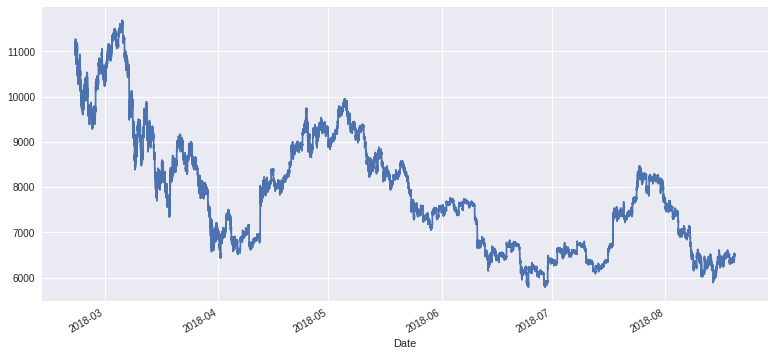

In [97]:
df_M['Average'].plot(figsize=(13,6))

In [98]:
df_M['PM1'] = df_M['Average'].rolling(pm1).mean()
df_M['PM2'] = df_M['Average'].rolling(pm2).mean()
df_M.dropna(inplace = True)
df_M.head()

,Average,PM1,PM2
Date,,,
2018-02-21 19:04:00,10485.285,10886.031224,10890.339052
2018-02-21 19:05:00,10492.255,10885.566532,10889.781858
2018-02-21 19:06:00,10500.850,10885.064361,10889.249349
2018-02-21 19:07:00,10515.825,10884.557267,10888.735066
2018-02-21 19:08:00,10517.220,10884.080762,10888.252330


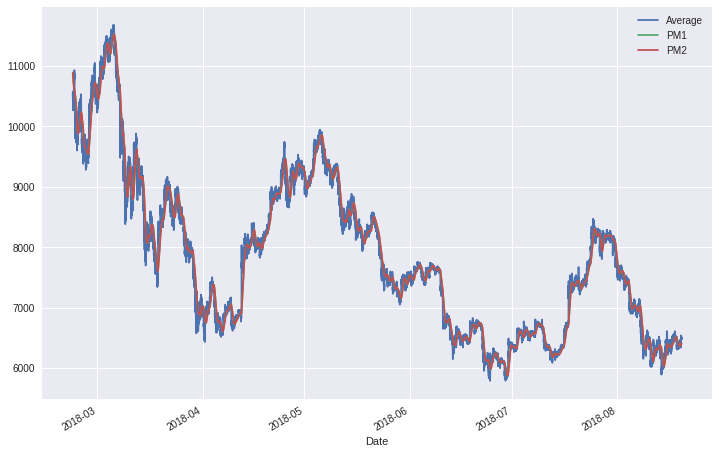

In [99]:
df_M.plot(figsize=(12,8))

In [100]:
df_M['Posicion'] = np.where(df_M['PM1'] > df_M['PM2'], 1, -1)

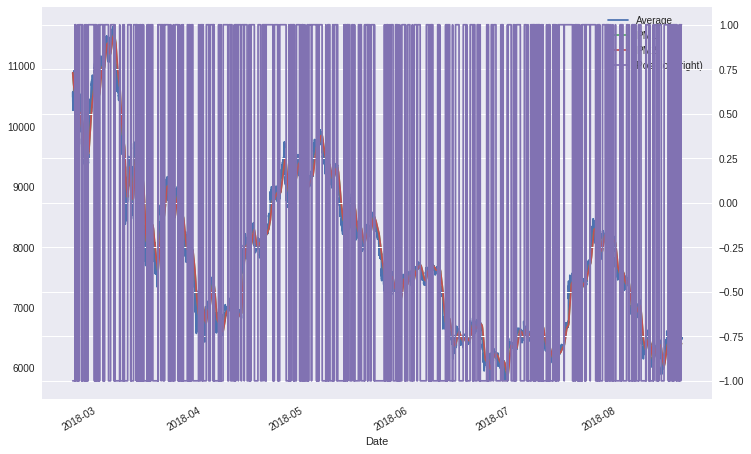

In [101]:
df_M.plot(figsize=(12,8), secondary_y = 'Posicion')

In [102]:
df_M['Retornos'] = np.log(df_M['Average']/df_M['Average'].shift(1))

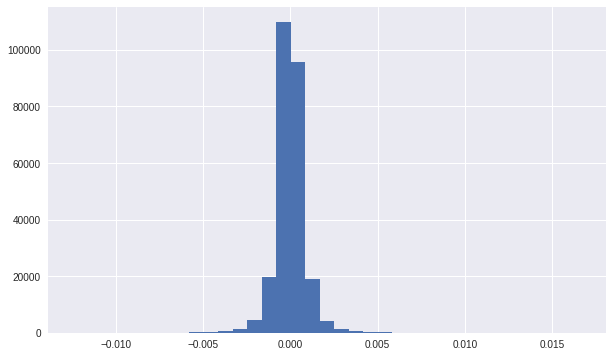

In [103]:
df_M['Retornos'].hist(bins=35, figsize=(10,6));

In [104]:
df_M.dropna(inplace = True)
df_M['Estrategia'] = df_M['Retornos']* df_M['Posicion'].shift(1)
df_M.dropna(inplace = True)
df_M.head()

,Average,PM1,PM2,Posicion,Retornos,Estrategia
Date,,,,,,
2018-02-21 19:06:00,10500.850,10885.064361,10889.249349,-1,0.000819,-0.000819
2018-02-21 19:07:00,10515.825,10884.557267,10888.735066,-1,0.001425,-0.001425
2018-02-21 19:08:00,10517.220,10884.080762,10888.252330,-1,0.000133,-0.000133
2018-02-21 19:09:00,10539.935,10883.593178,10887.776525,-1,0.002157,-0.002157
2018-02-21 19:10:00,10555.375,10883.113631,10887.319843,-1,0.001464,-0.001464


In [105]:
df_M['Retacum'] = df_M['Retornos'].cumsum().apply(np.exp)
df_M['Estracum'] = df_M['Estrategia'].cumsum().apply(np.exp)
df_M.tail()

,Average,PM1,PM2,Posicion,Retornos,Estrategia,Retacum,Estracum
Date,,,,,,,,
2018-08-19 23:56:00,6490.495,6409.100975,6407.756980,1,-0.000186,-0.000186,0.618599,3.989330
2018-08-19 23:57:00,6486.950,6409.196999,6407.863370,1,-0.000546,-0.000546,0.618261,3.987151
2018-08-19 23:58:00,6484.290,6409.293364,6407.970345,1,-0.000410,-0.000410,0.618007,3.985516
2018-08-19 23:59:00,6482.035,6409.379193,6408.069834,1,-0.000348,-0.000348,0.617792,3.984130
2018-08-20 00:00:00,6482.930,6409.464393,6408.170105,1,0.000138,0.000138,0.617878,3.984680


([], <a list of 0 Text xticklabel objects>)

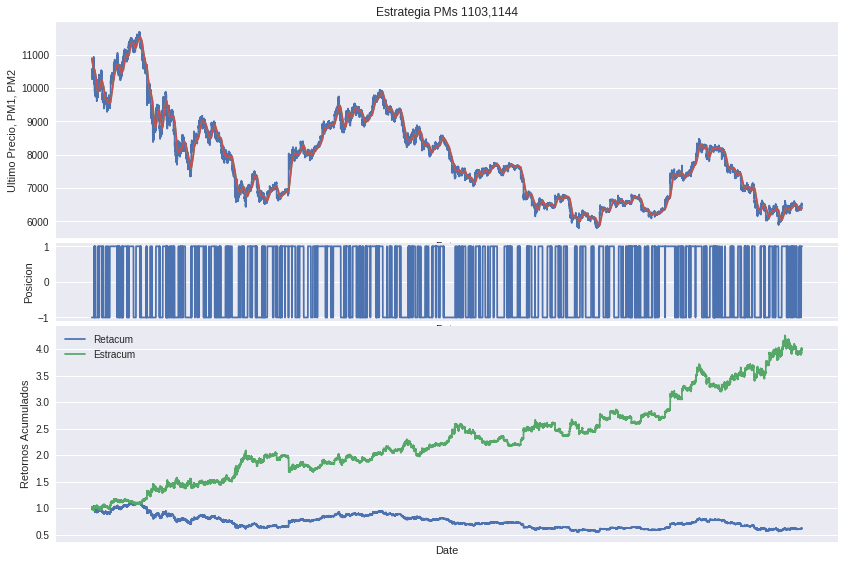

In [106]:
fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot2grid((25,1),(0,0),rowspan = 8, colspan = 1)
df_M['Average'].plot(title = ('Estrategia PMs ' + str(pm1) + ',' + str(pm2)))
df_M['PM1'].plot(ax=ax1)
df_M['PM2'].plot(ax=ax1)

ax1.set_ylabel('Ultimo Precio, PM1, PM2')
plt.xticks([],[])

ax2 = plt.subplot2grid((25,1),(8,0), rowspan = 3, colspan = 1)
df_M['Posicion'].plot(ylim=[-1.1,1.1])
ax2.set_ylabel('Posicion')
plt.xticks([],[])

ax3=plt.subplot2grid((25,1),(11,0),rowspan = 8, colspan = 1)
df_M[['Retacum', 'Estracum']].plot(ax = ax3)
ax3.set_ylabel('Retornos Acumulados')
plt.xticks([],[])

3.99 with minute values
1.38 with 5 minutes
1.23 with 10 min
2.5 with 15 min
2.83 with 30 min
2.72 with 60 min